In [73]:
from scipy import ndimage, datasets
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [74]:
image = cv2.imread('mount_field.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('image', image)
# cv2.waitKey(0)  
# cv2.destroyAllWindows()

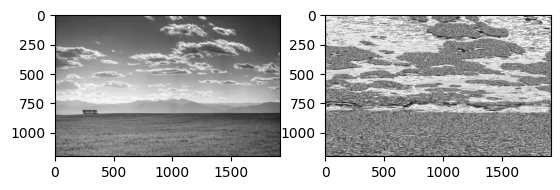

In [75]:
k = np.array([[-1]*50,[0]*50,[1]*50])
fig, (ax1, ax2) = plt.subplots(1, 2)
result0 = ndimage.gaussian_filter(image, sigma=2)
result1 = ndimage.convolve(image, k, mode='nearest')
plt.gray()
ax1.imshow(image)
ax2.imshow(result1)
plt.show()

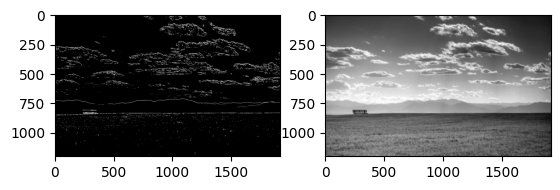

In [76]:
threshold_value = 100
ret, thresholded = cv2.threshold(result1, threshold_value, 255, cv2.THRESH_BINARY)
fig, (ax1, ax2) = plt.subplots(1, 2)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))

threshold_value = 100
ret, thresholded = cv2.threshold(sobel_x, threshold_value, 255, cv2.THRESH_BINARY)

# Отображение исходного изображения с нарисованной горизонтальной линией
ax1.imshow(thresholded)
ax2.imshow(result0)
plt.show()

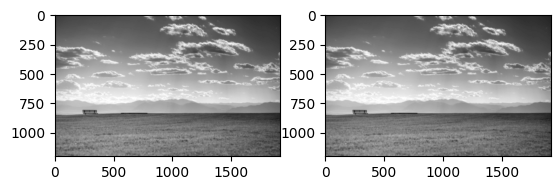

In [77]:
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Инициализация переменных для хранения информации о наиболее горизонтальном контуре
max_aspect_ratio = 0
most_horizontal_contour = None

fig, (ax1, ax2) = plt.subplots(1, 2)

# Проход по всем контурам
for contour in contours:
    # Вычисление ограничивающего прямоугольника для контура
    x, y, w, h = cv2.boundingRect(contour)
    
    # Вычисление соотношения ширины к высоте для текущего контура
    aspect_ratio = w / h
    
    # Если соотношение ширины к высоте текущего контура больше, чем у ранее найденных
    # наиболее горизонтальных контуров, обновляем информацию о наиболее горизонтальном контуре
    if aspect_ratio > max_aspect_ratio:
        max_aspect_ratio = aspect_ratio
        most_horizontal_contour = contour

# Нарисовать наиболее горизонтальный контур на изображении
cv2.drawContours(result0, [most_horizontal_contour]*10, -1, (0, 255, 0), 2)

# Отображение изображения с наиболее горизонтальным контуром
ax1.imshow(result0)
ax2.imshow(result0)
plt.show()